***Practica 2: Parte B***
Aprendizaje con modelo de regresión logística

In [ ]:
# --- PARTE B: Regresión Logística ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generar dataset sintético
def generar_datos(n):
    presion_arterial = np.random.uniform(70, 180, n)  # Valores entre 70 y 180
    colesterol = np.random.uniform(120, 250, n)  # Valores entre 120 y 250
    edad = np.random.uniform(0, 100, n)  # Valores entre 0 y 100 (factor aleatorio)
    
    # Probabilidad de riesgo cardiovascular (estandarizar)
    # Se calcula los datos en base a los rangos aportados por la profesora.
    # Presión arterial, si esta por encima de 100.
    # Colesteron por encima de 180.
    # Se suman las probabilidades para definir el factor de riesgo.
    prob_riesgo = (presion_arterial - 100) / 100 + (colesterol - 180) / 100 + (0.3 * edad)/100
    # Se aplica la ecuación de la regresión logística. 
    prob_riesgo = 1 / (1 + np.exp(-prob_riesgo))
    
    # Clasificación: 1 si la probabilidad es mayor a 0.5, 0 si es menor
    riesgo = (prob_riesgo > 0.5).astype(int)
    
    return np.column_stack((presion_arterial, colesterol, edad)), riesgo

# Generamos el dataset inicial de 800 instancias
X, y = generar_datos(800)

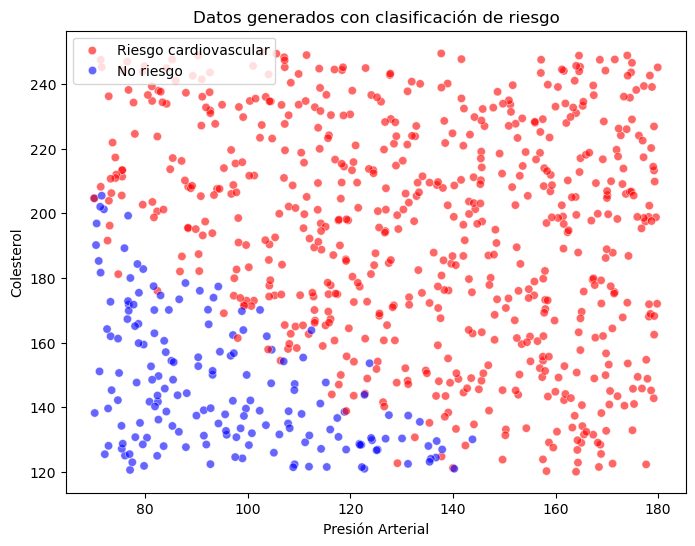

In [15]:
# 2. Visualización inicial de los datos
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=['blue', 'red'], alpha=0.6)
plt.xlabel("Presión Arterial")
plt.ylabel("Colesterol")
plt.title("Datos generados con clasificación de riesgo")
plt.legend(["Riesgo cardiovascular", "No riesgo"])
plt.show()

Después de la generación de los datos podemos observar como existe una tendencia de riesgo cardiovascular cuando los valores de colesterol y presión arterial suben.

Precisión del modelo: 0.99


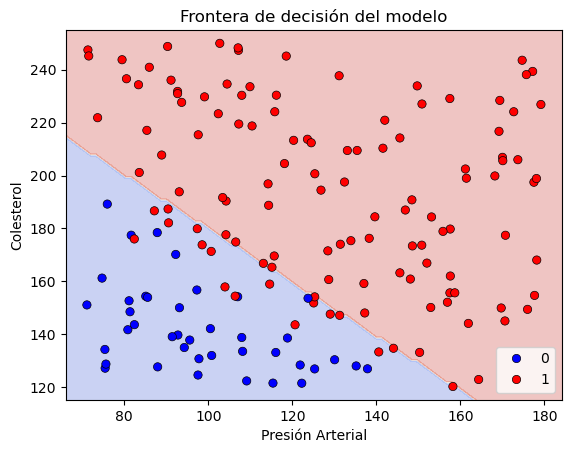

In [18]:
# 3. Entrenar modelo de regresión logística
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluación del modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {accuracy:.2f}")

# 5. Visualización de la frontera de decisión
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['blue', 'red'], edgecolor='k')
    plt.xlabel("Presión Arterial")
    plt.ylabel("Colesterol")
    plt.title("Frontera de decisión del modelo")
    plt.show()

plot_decision_boundary(modelo, X_test, y_test)

Como se puede observar el modelo hace algún fallo a la hora de designar los limites de cada set de respuestas, pero en su mayor parte es capaz de separar los valores.

Precisión del modelo: 1.00


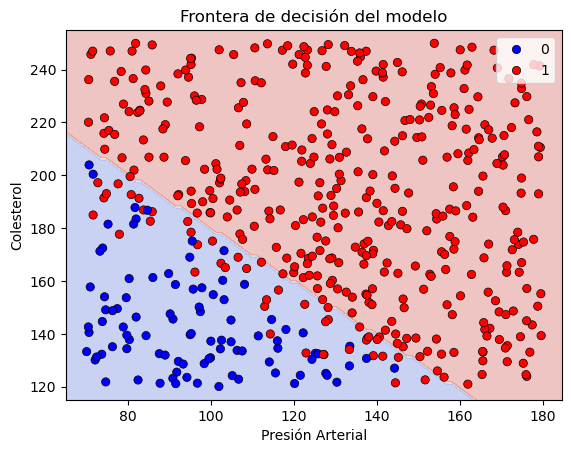

In [21]:
# 6. Generar un nuevo conjunto de datos con 500 instancias y comparar
X_nuevo, y_nuevo = generar_datos(500)
predicciones_nuevas = modelo.predict(X_nuevo)
accuracy = accuracy_score(y_nuevo, predicciones_nuevas)
print(f"Precisión del modelo: {accuracy:.2f}")
plot_decision_boundary(modelo, X_nuevo, y_nuevo)

Como se puede comprobar la precisión del modelo aumenta aunque sigue habiendo valores que se saltan la division de grupos (boundaries), esto puede ser devido al factor aleatorio edad que hemos introducido.